## Especificación del filtro
\begin{align}
    &N = 15 \\
    &H_d = 1 \Rightarrow k = 0, 1, 2, 3 \\
    &H_d = 0 \Rightarrow k = 4, 5, 6, 7
\end{align}

Entonces, por la forma de la especificación de los bines, es un pasabajos y como la longitud del filtro FIR es impar, tiene que ser tipo I. Entonces, busco en el análisis hecho en clase la forma del módulo de la respuesta en frecuencia,

\begin{align}
    &H_o(\omega) = \sum_{k = 0}^{7} a_k \cdot cos(k \cdot \omega)\\
    &H_o(k) = H_o(\omega = \frac{2 \pi \cdot k}{15}) = 
    &H_o(\omega) = \sum_{k = 0}^{7} a_k \cdot cos(k \cdot \frac{2 \pi \cdot k}{15})
\end{align}

\begin{align}
    &a_o = h(7) \\
    &a_k = 2 \cdot h(7 - k) \\
\end{align}

Entonces, le saco el 2 a los $a_k$ y lo meto dentro de los coeficientes de la matriz. Entonces resuelvo el problema del sistema de ecuaciones con algoritmos pertinentes. Obviamente le cedo el honor a numpy.

In [25]:
import numpy as np

N = 15
N_2 = int(np.ceil(N / 2))

# Creamos la matriz
A = np.zeros((N_2, N_2))
row = np.zeros(N_2)
for n in range(N_2):
    for k in range(N_2):
        row[k] = np.cos(k * n * 2 * np.pi / N)
        if k > 0:
            row[k] = row[k] * 2
    A[n] = row

# Creamos el vector
b = np.array([1, 1, 1, 1, 0, 0, 0, 0])
m = np.arange(0, np.pi, np.pi * 2 / 15)[:8]

# Resolvemos el problema
_h = np.linalg.solve(A, b)

h = np.zeros(15)
for n in range(7):
    h[n] = _h[7 - n]
    h[14 - n] = h[n]
h[7] = _h[0]

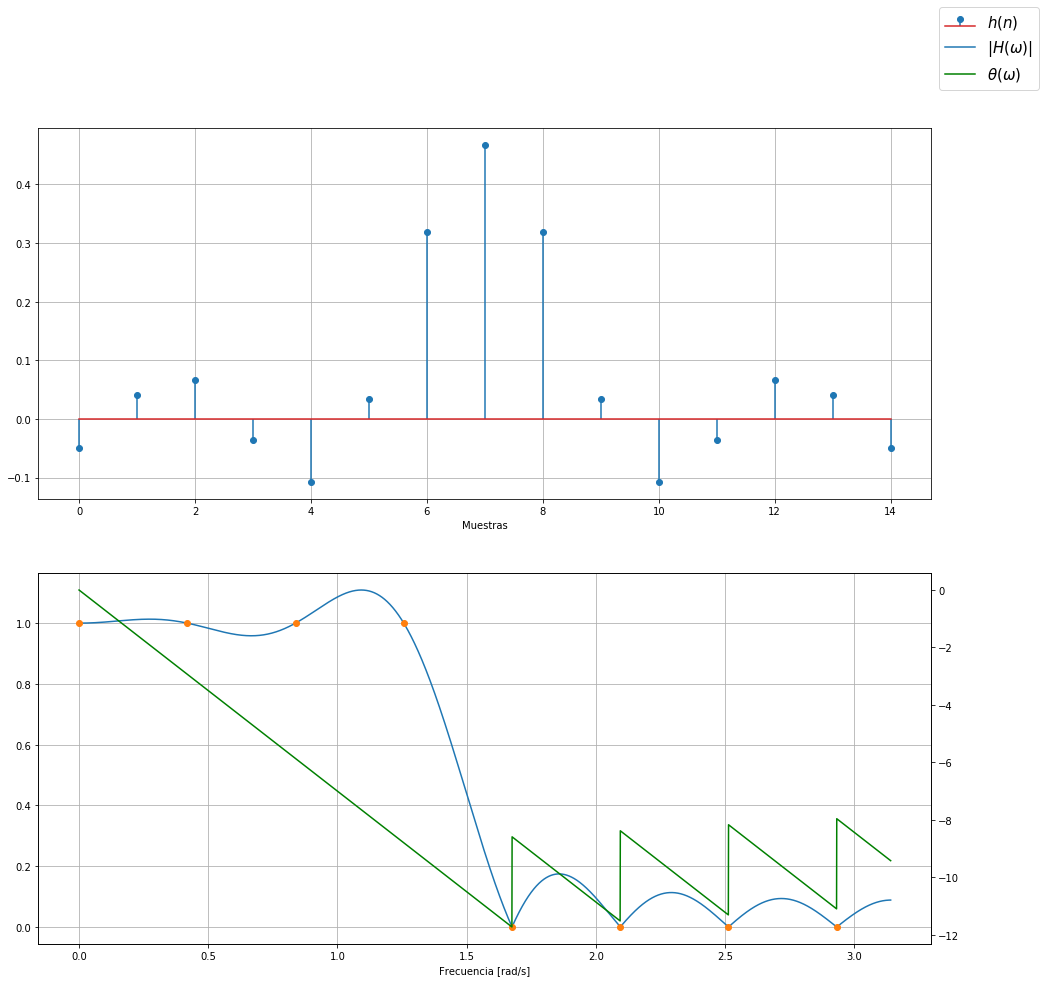

In [38]:
from matplotlib import pyplot
from scipy import signal

fig, (ax1, ax2) = pyplot.subplots(2, 1)

fig.set_figwidth(16)
fig.set_figheight(15)

ax1.stem(h, label='$h(n)$', use_line_collection=True)
ax1.grid()
ax1.set_xlabel('Muestras')

w, H = signal.freqz(h, worN=4096)
ax2.plot(w, abs(H), label='$|H(\omega)|$')
ax2.plot(m, b, marker='o', linestyle='None')
ax2.grid()
ax2.set_xlabel('Frecuencia [rad/s]')

ax3 = ax2.twinx()
ax3.plot(w, np.unwrap(np.angle(H)), label='$\\theta (\omega)$', color='green')

fig.legend(fontsize=15)

pyplot.show()

## Especificación del filtro

Se diseña un nuevo filtro, exactamente igual al anterior pero una de las muestras intermedias de la respuesta en frecuencia se coloca en una posición intermedia para garantizar que exista una banda de transición y amortiguar el fenómeno de Gibbs. Se elije para ello $T_4 = 0.4$.

In [39]:
import numpy as np

# Creamos la matriz
A = np.zeros((8, 8))
row = np.zeros(8)
for n in range(8):
    for k in range(8):
        row[k] = np.cos(k * n * 2 * np.pi / 15)
        if k > 0:
            row[k] = row[k] * 2
    A[n] = row

# Creamos el vector
b = np.array([1, 1, 1, 1, 0.4, 0, 0, 0])
m = np.arange(0, np.pi, np.pi * 2 / 15)[:8]

# Resolvemos el problema
_h = np.linalg.solve(A, b)

h = np.zeros(15)
for n in range(7):
    h[n] = _h[7 - n]
    h[14 - n] = h[n]
h[7] = _h[0]

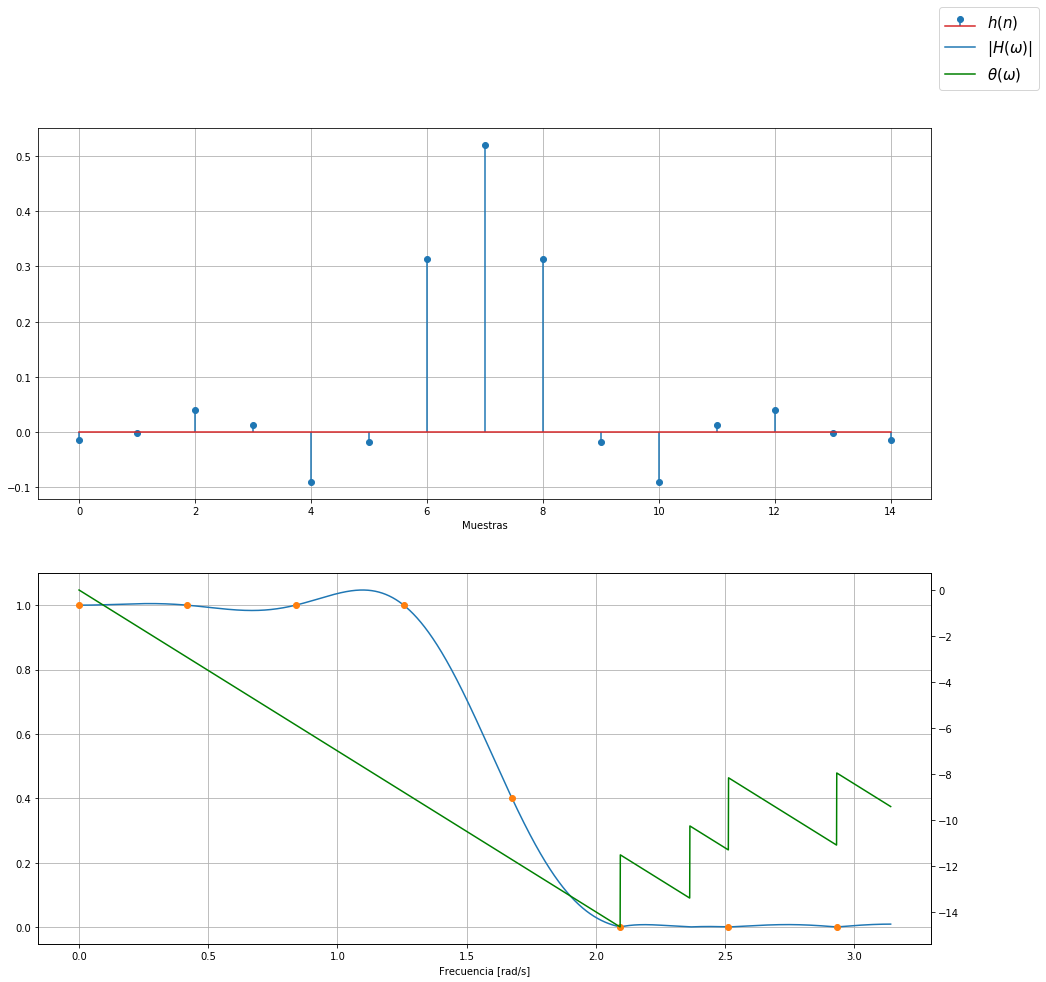

In [40]:
from matplotlib import pyplot
from scipy import signal

fig, (ax1, ax2) = pyplot.subplots(2, 1)

fig.set_figwidth(16)
fig.set_figheight(15)

ax1.stem(h, label='$h(n)$', use_line_collection=True)
ax1.grid()
ax1.set_xlabel('Muestras')

w, H = signal.freqz(h, worN=4096)
ax2.plot(w, abs(H), label='$|H(\omega)|$')
ax2.plot(m, b, marker='o', linestyle='None')
ax2.grid()
ax2.set_xlabel('Frecuencia [rad/s]')

ax3 = ax2.twinx()
ax3.plot(w, np.unwrap(np.angle(H)), label='$\\theta (\omega)$', color='green')

fig.legend(fontsize=15)

pyplot.show()

In [12]:
import numpy as np

N = 9
N_2 = int(np.ceil(N / 2))

# Creamos la matriz
A = np.zeros((N_2, N_2))
row = np.zeros(N_2)
for n in range(N_2):
    for k in range(N_2):
        row[k] = np.cos(k * n * 2 * np.pi / N)
        if k > 0:
            row[k] = row[k] * 2
    A[n] = row

# Creamos el vector
b = np.array([1, 1, 0, 0, 0])
m = np.arange(0, np.pi, np.pi * 2 / N)[:N_2]

# Resolvemos el problema
_h = np.linalg.solve(A, b)

h = np.zeros(N)
for n in range(N_2 - 1):
    h[n] = _h[N_2 - 1 - n]
    h[N - 1 - n] = h[n]
h[N_2 - 1] = _h[0]

print(_h)

print(A)

[ 3.33333333e-01  2.81343210e-01  1.49699595e-01  6.46747525e-17
 -9.77094713e-02]
[[ 1.          2.          2.          2.          2.        ]
 [ 1.          1.53208889  0.34729636 -1.         -1.87938524]
 [ 1.          0.34729636 -1.87938524 -1.          1.53208889]
 [ 1.         -1.         -1.          2.         -1.        ]
 [ 1.         -1.87938524  1.53208889 -1.          0.34729636]]


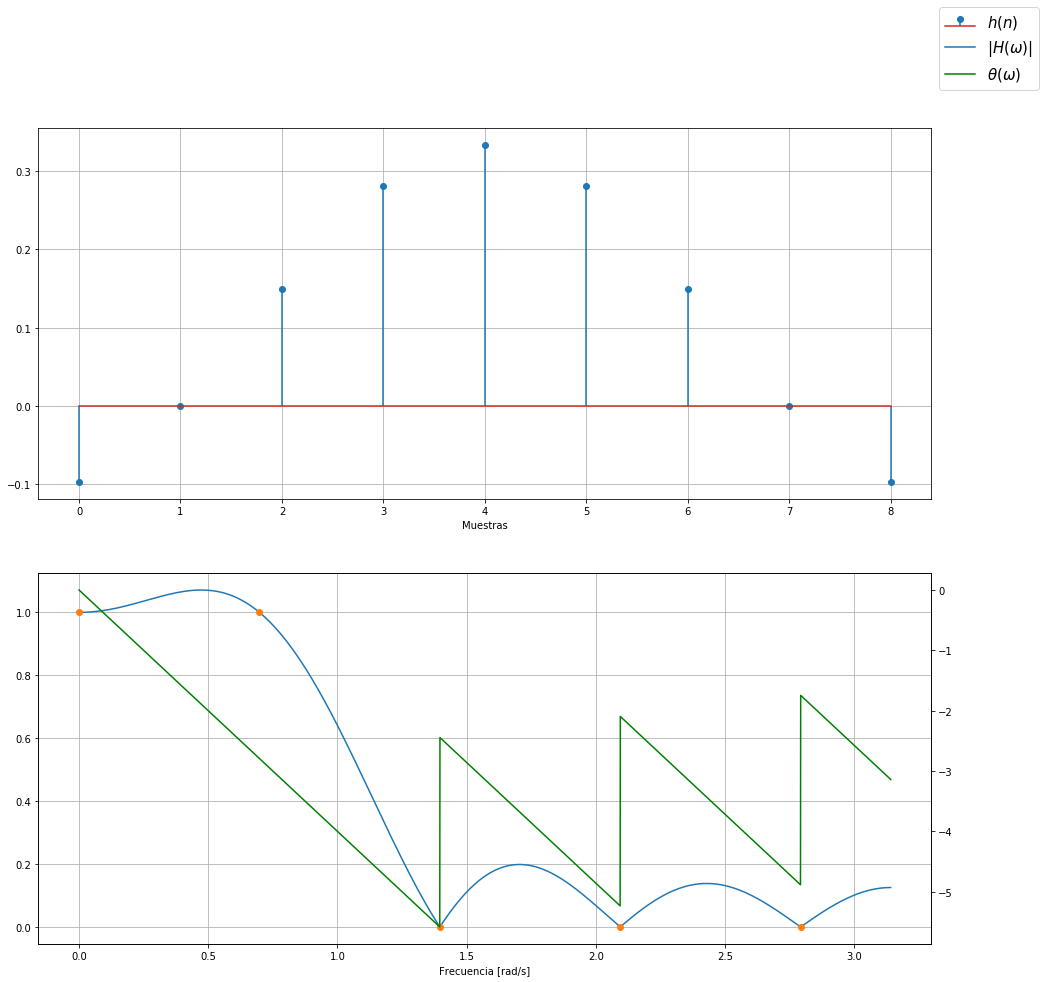

In [9]:
from matplotlib import pyplot
from scipy import signal

fig, (ax1, ax2) = pyplot.subplots(2, 1)

fig.set_figwidth(16)
fig.set_figheight(15)

ax1.stem(h, label='$h(n)$', use_line_collection=True)
ax1.grid()
ax1.set_xlabel('Muestras')

w, H = signal.freqz(h, worN=4096)
ax2.plot(w, abs(H), label='$|H(\omega)|$')
ax2.plot(m, b, marker='o', linestyle='None')
ax2.grid()
ax2.set_xlabel('Frecuencia [rad/s]')

ax3 = ax2.twinx()
ax3.plot(w, np.unwrap(np.angle(H)), label='$\\theta (\omega)$', color='green')

fig.legend(fontsize=15)

pyplot.show()

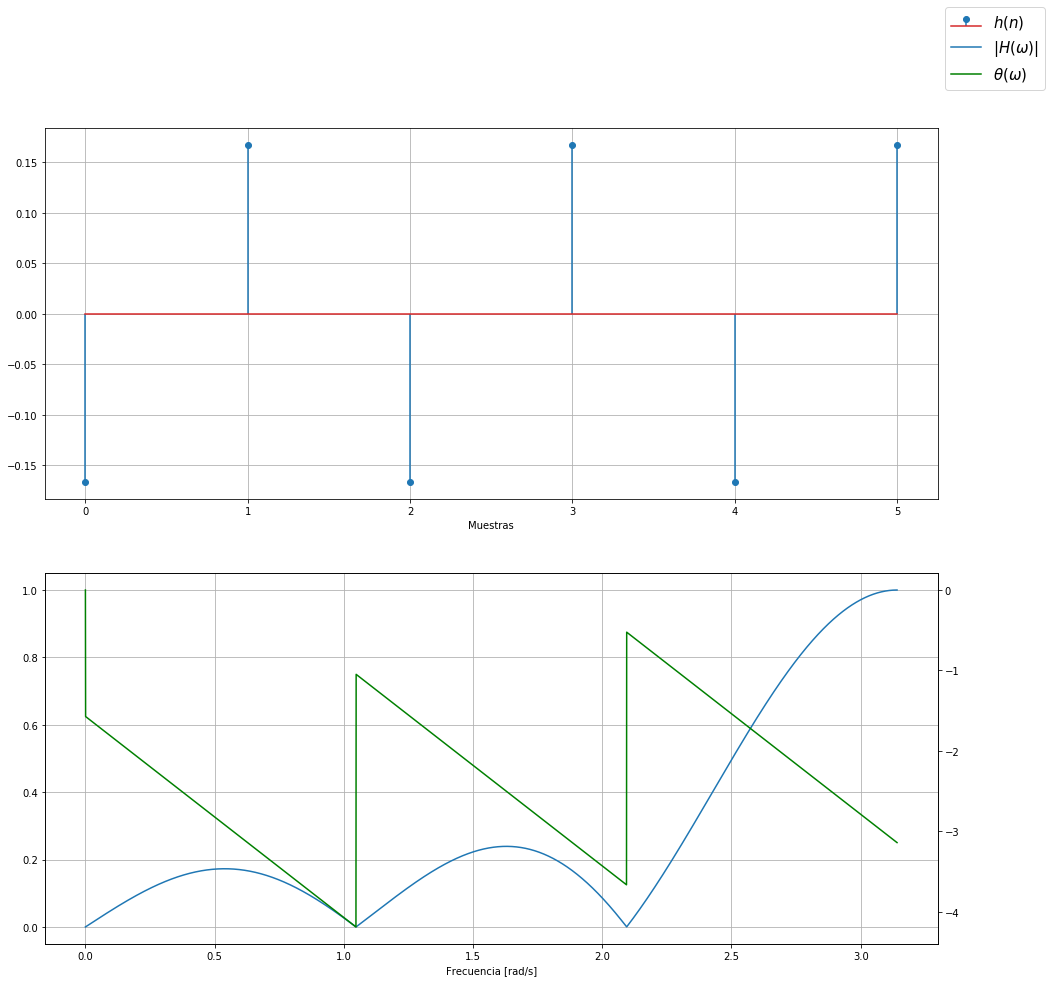

In [19]:
from matplotlib import pyplot
from scipy import signal

h = [ (-1)**(n - 3) / 6 for n in range(6) ]

fig, (ax1, ax2) = pyplot.subplots(2, 1)

fig.set_figwidth(16)
fig.set_figheight(15)

ax1.stem(h, label='$h(n)$', use_line_collection=True)
ax1.grid()
ax1.set_xlabel('Muestras')

w, H = signal.freqz(h, worN=4096)
ax2.plot(w, abs(H), label='$|H(\omega)|$')
ax2.grid()
ax2.set_xlabel('Frecuencia [rad/s]')

ax3 = ax2.twinx()
ax3.plot(w, np.unwrap(np.angle(H)), label='$\\theta (\omega)$', color='green')

fig.legend(fontsize=15)

pyplot.show()

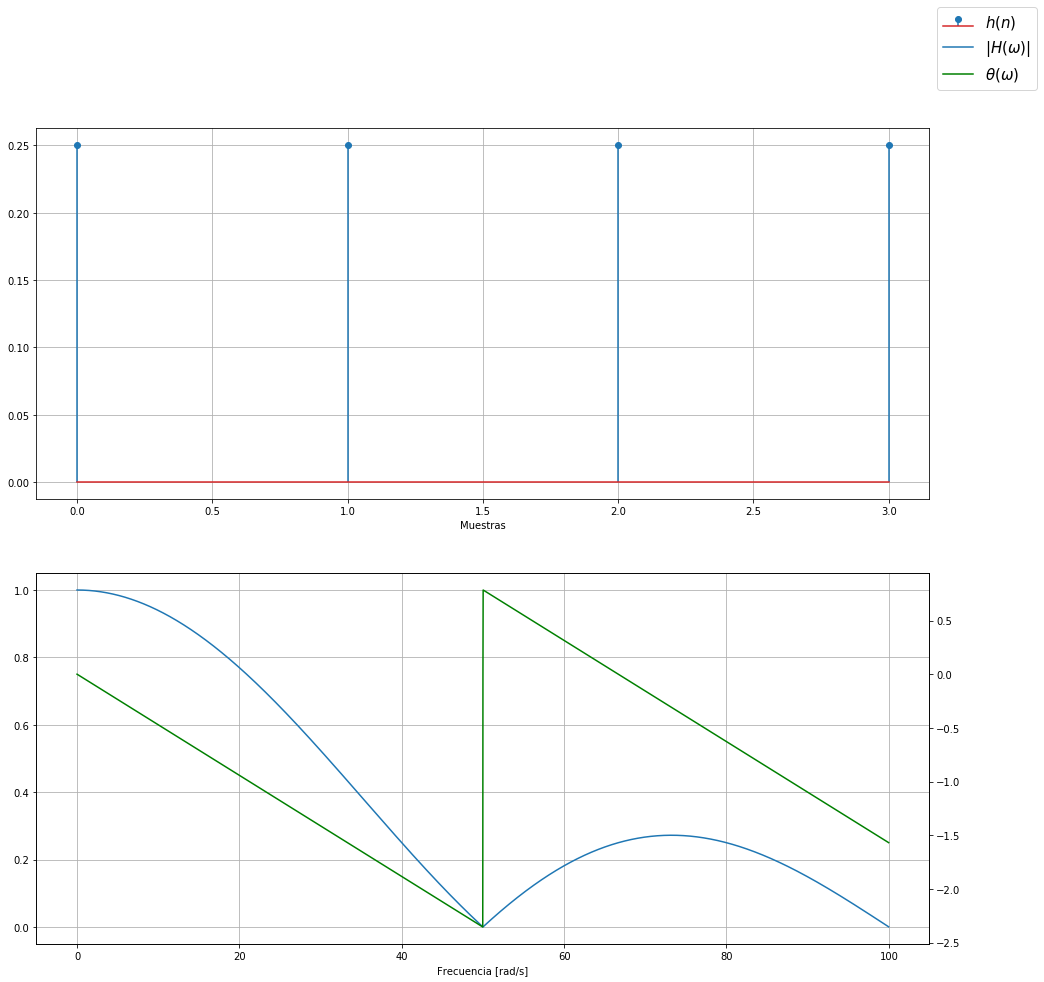

In [24]:
from matplotlib import pyplot
from scipy import signal

h = [ 1 / 4, 1 / 4, 1 / 4, 1 / 4 ]

fig, (ax1, ax2) = pyplot.subplots(2, 1)

fig.set_figwidth(16)
fig.set_figheight(15)

ax1.stem(h, label='$h(n)$', use_line_collection=True)
ax1.grid()
ax1.set_xlabel('Muestras')

w, H = signal.freqz(h, worN=4096)
ax2.plot(w * 200 / 2 / np.pi, abs(H), label='$|H(\omega)|$')
ax2.grid()
ax2.set_xlabel('Frecuencia [rad/s]')

ax3 = ax2.twinx()
ax3.plot(w * 200 / 2 / np.pi, np.unwrap(np.angle(H)), label='$\\theta (\omega)$', color='green')

fig.legend(fontsize=15)

pyplot.show()